<a href="https://colab.research.google.com/github/Ali-Felfel/NLP/blob/main/Machine_Learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from tqdm import tqdm_notebook as tqdm

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

In [ ]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 8

class_names = ['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy','Sadness','Surprise','Trust']

# **Importing the Data**

In [ ]:
df_train  = pd.read_csv("training_set.txt", delimiter = "\t",encoding='utf-8')
df_test  = pd.read_csv("dev_set.txt", delimiter = "\t",encoding='utf-8')

In [ ]:
X_train = df_train.sentence
X_test = df_test.sentence

y_train = df_train.emotion
y_test = df_test.emotion

In [ ]:
data = pd.concat([df_train, df_test])

In [ ]:
print('size of training set: %s' % (len(df_train['sentence'])))
print('size of validation set: %s' % (len(df_test['sentence'])))
print(data.emotion.value_counts())

data.head()

size of training set: 14000
size of validation set: 1000
1    3210
2    2299
8    2253
5    1567
4    1546
6    1471
3    1420
7    1234
Name: emotion, dtype: int64


,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# **Preprocessing**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
import re 

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

In [ ]:
shortword = re.compile(r'\W*\b\w{1,3}\b')


In [ ]:
def clean(text_list, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.lower()
#         #Tokenize
        # text = re.split('\s+' ,text)     

        text = shortword.sub('', text)    
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        text = re.sub("[^a-zA-Z]", ' ', text)
        #REMOVE TAGS
        text = BeautifulSoup(text).get_text()
        
        #REMOVE STOP WORDS
        text = ' '.join([word for word in text.split() if word not in stop])
        
        #LEMMATIZATION
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #STEMMER
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"sentence": list_updated}))

In [ ]:
updates = clean(X_train, lemmatize = False, stemmer = True)

update_df(df_train, updates)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/14000 [00:00<?, ?it/s]

In [ ]:
updates = clean(X_test , lemmatize = False, stemmer = True)

update_df(df_test, updates)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)   

        
    return stem_data

In [ ]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.sentence)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

# **Modeling**

# **Naive Bayes**

Accuracy: 31.80%

F1 Score: 31.80

COnfusion Matrix:
 [[183  15   0   1   0   4   0   8]
 [ 96  56   0   0   3   0   1  14]
 [ 61   5   1   1   1   2   0   6]
 [ 81   9   0   5   2   0   0   7]
 [ 47  15   0   1  22   1   0  11]
 [ 63   5   0   0   5   7   0   7]
 [ 76   6   0   2   5   0   0   7]
 [ 91  13   0   0  10   0   0  44]]


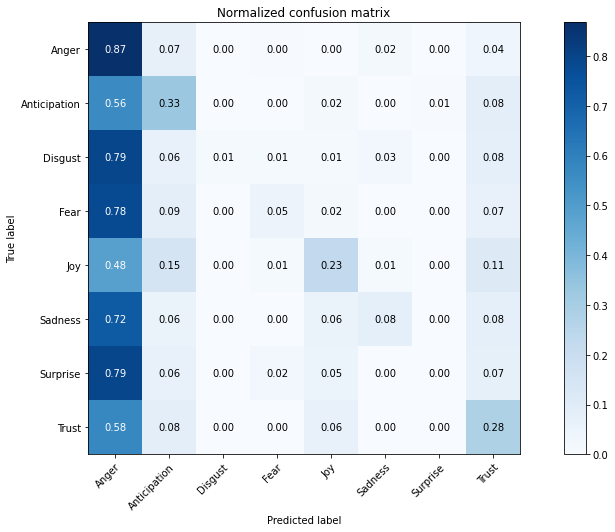

In [ ]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# **Random Forrest**

Accuracy: 32.00%

F1 Score: 32.00

COnfusion Matrix:
 [[129  32   7   8   3  14   5  13]
 [ 46  62   2  13  14   6   6  21]
 [ 32  13   8  11   3   4   2   4]
 [ 40  14   4  23   2   6   7   8]
 [ 16  19   4   1  33   5   7  12]
 [ 33  11   3   4   7  19   3   7]
 [ 37  17   3   3   5   9  14   8]
 [ 52  26   3  15  18   7   5  32]]


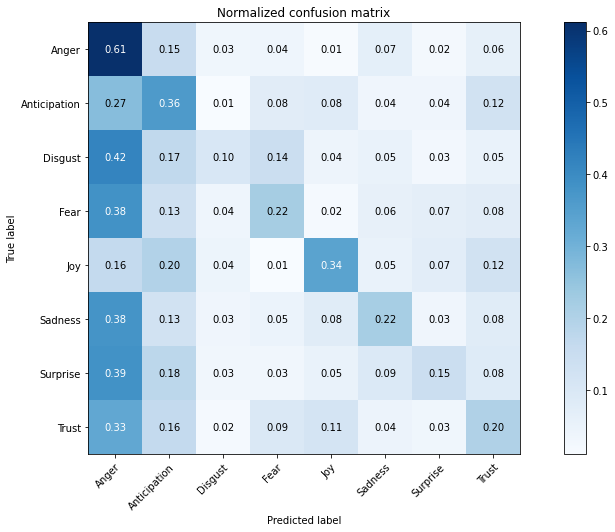

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# **Logestic Regression**

Accuracy: 35.00%

F1 Score: 35.00

COnfusion Matrix:
 [[133  27   9  11   1  12   5  13]
 [ 54  77   2   2  12   3   4  16]
 [ 38  13   3   5   3   2   2  11]
 [ 44  15   3  16   3   9   2  12]
 [ 19  18   0   1  37   4   4  14]
 [ 38   7   1   6   9  16   4   6]
 [ 48  15   1   5   4   3  14   6]
 [ 50  20   4   4  18   4   4  54]]


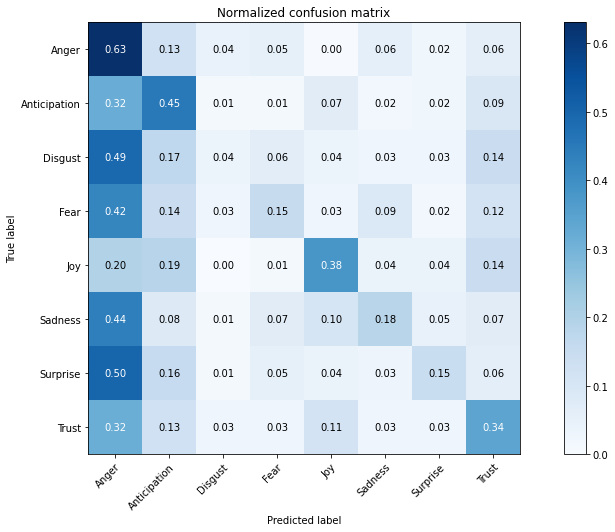

In [ ]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# **SVC**

Accuracy: 30.80%

F1 Score: 30.80

COnfusion Matrix:
 [[104  30   8  14   5  19  11  20]
 [ 42  60   7   7  15   4  13  22]
 [ 27  10   9   8   3   4   3  13]
 [ 31  18   8  20   4  10   3  10]
 [ 14  17   1   2  37   7   5  14]
 [ 28   5   3   8   9  17   6  11]
 [ 30  16   0   8  11   4  18   9]
 [ 47  26   6   8  17   5   6  43]]


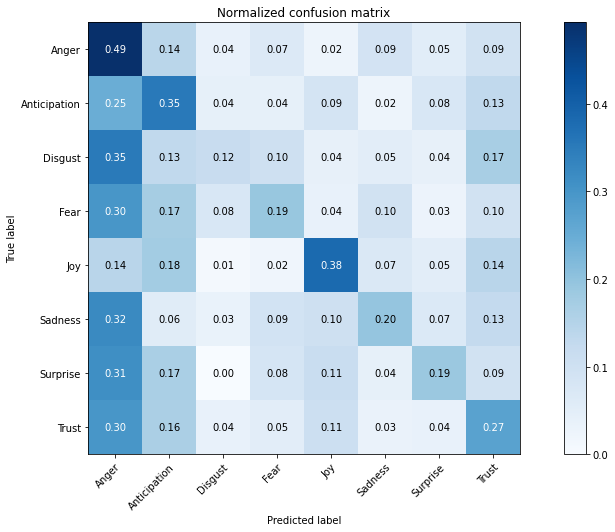

In [ ]:
svc = LinearSVC(tol=2e-08)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()